<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-notebook-project-3" data-toc-modified-id="Learning-notebook-project-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning notebook project 3</a></span><ul class="toc-item"><li><span><a href="#Get-data" data-toc-modified-id="Get-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get data</a></span></li><li><span><a href="#Shape-&amp;-column-names" data-toc-modified-id="Shape-&amp;-column-names-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Shape &amp; column names</a></span></li><li><span><a href="#Modules" data-toc-modified-id="Modules-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Modules</a></span></li><li><span><a href="#Preprocessor" data-toc-modified-id="Preprocessor-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Preprocessor</a></span></li><li><span><a href="#X-&amp;-y" data-toc-modified-id="X-&amp;-y-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>X &amp; y</a></span></li></ul></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GradientBoostingRegressor</a></span></li><li><span><a href="#Amélioration-de-RandomForestRegressor" data-toc-modified-id="Amélioration-de-RandomForestRegressor-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Amélioration de RandomForestRegressor</a></span></li><li><span><a href="#Importance-des-Features" data-toc-modified-id="Importance-des-Features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Importance des Features</a></span></li></ul></div>

### Learning notebook project 3
#### Get data

In [60]:
import pandas as pd
df = pd.read_csv("P3_cleaaned_2021-12.csv", sep=',')  
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,...,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,...,0,88434,Hotel,88434.0,2.013701e+11,60.0,7226362.5,7456910.0,249.98,2.83
1,2,2016,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,...,15064,88502,Hotel,83880.0,2.013701e+11,61.0,8387933.0,8664479.0,295.86,2.86
2,3,2016,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,...,196718,759392,Hotel,756493.0,2.013701e+11,43.0,72587024.0,73937112.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,...,0,61320,Hotel,61320.0,2.013701e+11,56.0,6794584.0,6946800.5,286.43,4.67
4,8,2016,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,...,62000,113580,Hotel,123445.0,2.013701e+11,75.0,14172606.0,14656503.0,505.01,2.88


#### Shape & column names

In [61]:
df.shape
print(df.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)'],
      dtype='object')


#### Modules
https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb

In [62]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import numpy as np

#### Preprocessor

In [63]:
#'CouncilDistrictCode', 'YearsENERGYSTARCertified'
# YearsENERGYSTARCertified vérifier NaN % dans le premier notebook

numeric_features = ['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
                    'ENERGYSTARScore', 'LargestPropertyUseTypeGFA']
categorical_features = ["BuildingType", "PrimaryPropertyType", "Neighborhood", 'LargestPropertyUseType']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#### X & y

In [64]:
Xcols = numeric_features + categorical_features
print(Xcols)
X = df[Xcols]
y = df['GHGEmissions(MetricTonsCO2e)']

['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'LargestPropertyUseTypeGFA', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType']


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### ElasticNet

In [66]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', ElasticNet())])
# ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 
#https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge
# np.log [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
param_grid = {'model__alpha': np.logspace(-5, 5, 8, endpoint=True), 'model__l1_ratio': np.arange(0, 0.5, 0.1), 'model__max_iter': [10000]}

In [67]:
search = GridSearchCV(pipe, param_grid, return_train_score=True)

In [68]:
results_elasticnet = search.fit(X_train,y_train)
print(results_elasticnet)

/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41318939.7734252, tolerance: 29638.913332687993
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40745780.06839234, tolerance: 28213.877854702794
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33560873.36450786, tolerance: 27071.635418133123
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/pyt

/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42004861.9456484, tolerance: 28213.877854702794
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35075718.069584884, tolerance: 27071.635418133123
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34706468.402323656, tolerance: 28211.302240604255
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/p

/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47948348.33719095, tolerance: 27071.635418133123
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50652346.49726341, tolerance: 28211.302240604255
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20137229.91579523, tolerance: 7558.882755787957
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/pyt

/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141054794.9350365, tolerance: 28211.302240604255
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37794084.027504444, tolerance: 7558.882755787957
  model = cd_fast.sparse_enet_coordinate_descent(


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

In [91]:
print('Best score: {:.2f}'.format(results_elasticnet.best_score_))
print('Best params: %s' % results_elasticnet.best_params_)
print("Best estimator: {}".format(results_elasticnet.best_estimator_))

Best score: 0.17
Best params: {'model__alpha': 5.1794746792312125, 'model__l1_ratio': 0.1, 'model__max_iter': 10000}
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'YearBuilt',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                        

In [92]:
result_elastic_df = pd.DataFrame(results_elasticnet.cv_results_)
result_elastic_df.sort_values(['mean_test_score'],ascending = False)[:10]
# https://www.kaggle.com/tomehta/elastic-net-with-hyper-param-tuning-using-grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,param_model__max_iter,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
21,0.013246,0.001379,0.006093,0.000090,5.179475,0.1,10000,"{'model__alpha': 5.1794746792312125, 'model__l...",0.063042,0.194832,...,0.173021,0.094038,1,0.249123,0.236640,0.235426,0.253903,0.169306,0.228880,0.030620
20,2.392016,0.054053,0.008263,0.000758,5.179475,0.0,10000,"{'model__alpha': 5.1794746792312125, 'model__l...",0.085222,0.187981,...,0.172346,0.085363,2,0.236672,0.224741,0.223197,0.241278,0.162145,0.217607,0.028573
22,0.014501,0.002382,0.006376,0.000210,5.179475,0.2,10000,"{'model__alpha': 5.1794746792312125, 'model__l...",0.032728,0.202073,...,0.172201,0.105646,3,0.263071,0.250000,0.249237,0.268028,0.177262,0.241520,0.032947
23,0.013655,0.000723,0.006299,0.000386,5.179475,0.3,10000,"{'model__alpha': 5.1794746792312125, 'model__l...",-0.008752,0.209664,...,0.169176,0.121411,4,0.278807,0.265131,0.264989,0.283950,0.186176,0.255811,0.035611
24,0.012925,0.000261,0.006197,0.000176,5.179475,0.4,10000,"{'model__alpha': 5.1794746792312125, 'model__l...",-0.065457,0.217568,...,0.162427,0.142982,5,0.296741,0.282447,0.283165,0.301875,0.196253,0.272096,0.038668
29,0.013420,0.001509,0.007703,0.002263,138.949549,0.4,10000,"{'model__alpha': 138.9495494373139, 'model__l1...",-0.136118,0.018470,...,-0.013291,0.062193,6,0.021347,0.019993,0.019335,0.021649,0.010282,0.018521,0.004207
28,0.012686,0.000186,0.006441,0.000347,138.949549,0.3,10000,"{'model__alpha': 138.9495494373139, 'model__l1...",-0.141286,0.016882,...,-0.015499,0.063520,7,0.019501,0.018346,0.017763,0.019862,0.010645,0.017223,0.003376
27,0.014891,0.004154,0.006562,0.000392,138.949549,0.2,10000,"{'model__alpha': 138.9495494373139, 'model__l1...",-0.144455,0.015789,...,-0.016962,0.064275,8,0.018168,0.017161,0.016653,0.018541,0.011004,0.016305,0.002736
26,0.013886,0.001445,0.006759,0.000398,138.949549,0.1,10000,"{'model__alpha': 138.9495494373139, 'model__l1...",-0.146698,0.015146,...,-0.017956,0.064835,9,0.017249,0.016328,0.015874,0.017602,0.011378,0.015686,0.002241
25,2.628121,0.475250,0.011518,0.004994,138.949549,0.0,10000,"{'model__alpha': 138.9495494373139, 'model__l1...",-0.148222,0.014852,...,-0.018532,0.065267,10,0.016578,0.015742,0.015326,0.016917,0.012081,0.015329,0.001721


In [93]:
best_index_elastic = results_elasticnet.best_index_
print(best_index_elastic)

21


In [94]:
print(result_elastic_df.iloc[best_index_elastic])

mean_fit_time                                                     0.013246
std_fit_time                                                      0.001379
mean_score_time                                                   0.006093
std_score_time                                                     0.00009
param_model__alpha                                                5.179475
param_model__l1_ratio                                                  0.1
param_model__max_iter                                                10000
params                   {'model__alpha': 5.1794746792312125, 'model__l...
split0_test_score                                                 0.063042
split1_test_score                                                 0.194832
split2_test_score                                                 0.336648
split3_test_score                                                   0.1671
split4_test_score                                                 0.103484
mean_test_score          

### RandomForestRegressor

In [139]:
from sklearn.ensemble import RandomForestRegressor
pipe_forest = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor())])

In [140]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [10, 20, 50, 100]

#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]

param_grid_forest = {'model__n_estimators' : n_estimators
                     , 'model__max_features': ['auto', 'sqrt'] }

print(param_grid_forest)

{'model__n_estimators': [10, 20, 50, 100], 'model__max_features': ['auto', 'sqrt']}


In [141]:
search_forest = GridSearchCV(pipe_forest, param_grid_forest, return_train_score=True)
print(search_forest)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

In [142]:
results_forest = search_forest.fit(X_train,y_train)
print(results_forest)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

In [143]:
results_forest_df = pd.DataFrame(results_forest.cv_results_)
results_forest_df.sort_values(['mean_test_score'],ascending = False)[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_features,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.406891,0.005468,0.020980,0.003071,sqrt,100,"{'model__max_features': 'sqrt', 'model__n_esti...",0.585040,0.426434,0.610862,...,0.427313,0.154536,1,0.931283,0.914232,0.924265,0.942143,0.908149,0.924014,0.012074
6,0.211664,0.010365,0.012639,0.000098,sqrt,50,"{'model__max_features': 'sqrt', 'model__n_esti...",0.468226,0.400738,0.611290,...,0.412332,0.121751,2,0.933516,0.915922,0.903418,0.899140,0.900612,0.910522,0.012931
5,0.089840,0.001630,0.009140,0.000086,sqrt,20,"{'model__max_features': 'sqrt', 'model__n_esti...",0.534873,0.501561,0.340914,...,0.365416,0.140197,3,0.903447,0.915154,0.939062,0.950362,0.939940,0.929593,0.017437
4,0.051584,0.000835,0.007794,0.000058,sqrt,10,"{'model__max_features': 'sqrt', 'model__n_esti...",0.352497,0.362701,0.201059,...,0.192093,0.204724,4,0.929275,0.896850,0.893558,0.938253,0.872231,0.906033,0.024334
2,0.903611,0.017045,0.012813,0.000175,auto,50,"{'model__max_features': 'auto', 'model__n_esti...",0.397043,0.462474,-0.758302,...,0.098146,0.448860,5,0.944269,0.868215,0.909376,0.917944,0.917552,0.911471,0.024617
3,1.784119,0.016752,0.020059,0.001482,auto,100,"{'model__max_features': 'auto', 'model__n_esti...",0.297758,0.426884,-0.680464,...,0.060919,0.398718,6,0.916959,0.924418,0.929705,0.930242,0.923622,0.924989,0.004827
1,0.376325,0.020010,0.010206,0.000939,auto,20,"{'model__max_features': 'auto', 'model__n_esti...",0.365842,0.436761,-1.652463,...,-0.165791,0.780284,7,0.910207,0.911916,0.890871,0.938825,0.896992,0.909762,0.016549
0,0.194184,0.010712,0.008263,0.000715,auto,10,"{'model__max_features': 'auto', 'model__n_esti...",0.019637,0.440998,-0.787894,...,-0.376082,0.796532,8,0.926351,0.861155,0.888426,0.875099,0.877583,0.885723,0.022094


In [144]:
best_index_forest = results_forest.best_index_
print(best_index_forest)

7


In [145]:
print(results_forest_df.iloc[best_index_forest])

mean_fit_time                                                         0.406891
std_fit_time                                                          0.005468
mean_score_time                                                        0.02098
std_score_time                                                        0.003071
param_model__max_features                                                 sqrt
param_model__n_estimators                                                  100
params                       {'model__max_features': 'sqrt', 'model__n_esti...
split0_test_score                                                      0.58504
split1_test_score                                                     0.426434
split2_test_score                                                     0.610862
split3_test_score                                                     0.219019
split4_test_score                                                     0.295208
mean_test_score                                     

### GradientBoostingRegressor

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
pipe_gradient = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingRegressor())])

In [147]:
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
# number of estimators
# learning rate
# subsample
# max depth
n_estimators = [500,1000,2000] # 10, 20, 50, 100, 200
learning_rate = [.001,0.01,.1] 
subsample = [.5,.75,1] # 0.2, 0.4, 0,6, 0,8, 1
max_depth = [1,2,4, 6, 8, 10]

param_grid_gradient = { 'model__n_estimators' : n_estimators
                      , 'model__learning_rate' : learning_rate
                      , 'model__subsample' : subsample
                      , 'model__max_depth' : max_depth }

print(param_grid_gradient)

{'model__n_estimators': [500, 1000, 2000], 'model__learning_rate': [0.001, 0.01, 0.1], 'model__subsample': [0.5, 0.75, 1], 'model__max_depth': [1, 2, 4, 6, 8, 10]}


In [148]:
search_gradient = GridSearchCV(pipe_gradient, param_grid_gradient, return_train_score=True)
print(search_gradient)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

In [149]:
results_gradient = search_forest.fit(X_train,y_train)
print(results_gradient)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

In [150]:
results_gradient_df = pd.DataFrame(results_gradient.cv_results_)
results_gradient_df.sort_values(['mean_test_score'],ascending = False)[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_features,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.328864,0.067879,0.029104,0.018523,sqrt,50,"{'model__max_features': 'sqrt', 'model__n_esti...",0.561775,0.392855,0.551606,...,0.414980,0.123229,1,0.931434,0.922109,0.931719,0.885819,0.918351,0.917887,0.016860
7,0.599384,0.083344,0.030634,0.009119,sqrt,100,"{'model__max_features': 'sqrt', 'model__n_esti...",0.557332,0.420848,0.537013,...,0.410278,0.125185,2,0.933145,0.930910,0.932508,0.930755,0.925473,0.930558,0.002702
4,0.062204,0.005746,0.010975,0.002149,sqrt,10,"{'model__max_features': 'sqrt', 'model__n_esti...",0.317292,0.381653,0.625920,...,0.392736,0.119135,3,0.902832,0.898738,0.824003,0.952329,0.881641,0.891909,0.041311
5,0.153740,0.019046,0.018623,0.007283,sqrt,20,"{'model__max_features': 'sqrt', 'model__n_esti...",0.404241,0.480834,0.528040,...,0.381501,0.119934,4,0.907075,0.906222,0.944483,0.874124,0.879319,0.902245,0.025058
3,1.825618,0.055465,0.021414,0.003630,auto,100,"{'model__max_features': 'auto', 'model__n_esti...",0.396167,0.428576,-0.450150,...,0.163474,0.324050,5,0.935128,0.902609,0.898596,0.918209,0.921306,0.915170,0.013249
2,0.916712,0.026652,0.015340,0.003623,auto,50,"{'model__max_features': 'auto', 'model__n_esti...",0.339082,0.403743,-0.872366,...,0.056006,0.472766,6,0.904424,0.937067,0.928554,0.930054,0.917905,0.923601,0.011382
1,0.363880,0.007853,0.009171,0.000218,auto,20,"{'model__max_features': 'auto', 'model__n_esti...",0.216484,0.389438,-1.255546,...,-0.131422,0.621843,7,0.814523,0.953485,0.926444,0.924625,0.918414,0.907498,0.048022
0,0.198642,0.019937,0.008854,0.000865,auto,10,"{'model__max_features': 'auto', 'model__n_esti...",0.222609,0.326455,-1.920777,...,-0.205358,0.863013,8,0.832688,0.883946,0.916400,0.941981,0.910198,0.897043,0.037095


In [151]:
best_index_gradient = results_gradient.best_index_
print(best_index_gradient)

6


In [152]:
print(results_gradient_df.iloc[best_index_gradient])

mean_fit_time                                                         0.328864
std_fit_time                                                          0.067879
mean_score_time                                                       0.029104
std_score_time                                                        0.018523
param_model__max_features                                                 sqrt
param_model__n_estimators                                                   50
params                       {'model__max_features': 'sqrt', 'model__n_esti...
split0_test_score                                                     0.561775
split1_test_score                                                     0.392855
split2_test_score                                                     0.551606
split3_test_score                                                     0.307618
split4_test_score                                                     0.261047
mean_test_score                                     

(0.013245630264282226, 0.4068912506103516, 0.32886438369750975)
(0.00609278678894043, 0.020980119705200195, 0.029103612899780272)
[0 3 6]


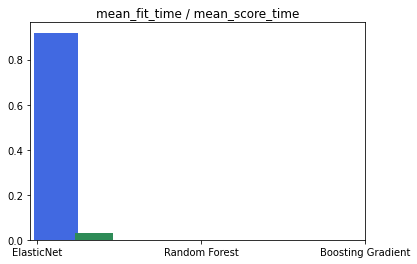

In [177]:
import matplotlib.pyplot as plt

N = 3
mean_fit_time = (result_elastic_df.iloc[best_index_elastic].mean_fit_time, results_forest_df.iloc[best_index_forest].mean_fit_time, results_gradient_df.iloc[best_index_gradient].mean_fit_time)
mean_score_time = (result_elastic_df.iloc[best_index_elastic].mean_score_time, results_forest_df.iloc[best_index_forest].mean_score_time, results_gradient_df.iloc[best_index_gradient].mean_score_time)

print(mean_fit_time)
print(mean_score_time)


ind = np.arange(N) * 3
print(ind)
width = 0.7 

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(width, mean_train_score, color='royalblue')
rects2 = ax.bar(width+width, mean_score_time, width, color='seagreen')

gridnumber = range(1,4)

ax.set_title('mean_fit_time / mean_score_time')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('ElasticNet', 'Random Forest', 'Boosting Gradient') )

plt.show()

[0 3 6]


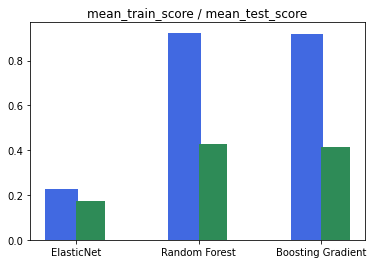

In [154]:
import matplotlib.pyplot as plt

N = 3
mean_train_score = (result_elastic_df.iloc[best_index_elastic].mean_train_score, results_forest_df.iloc[best_index_forest].mean_train_score, results_gradient_df.iloc[best_index_gradient].mean_train_score)
mean_test_score = (result_elastic_df.iloc[best_index_elastic].mean_test_score, results_forest_df.iloc[best_index_forest].mean_test_score, results_gradient_df.iloc[best_index_gradient].mean_test_score)


ind = np.arange(N) * 3
print(ind)
width = 0.7 

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, mean_train_score, color='royalblue')
rects2 = ax.bar(ind+width, mean_test_score, width, color='seagreen')

gridnumber = range(1,4)

ax.set_title('mean_train_score / mean_test_score')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('ElasticNet', 'Random Forest', 'Boosting Gradient') )

plt.show()

### Amélioration de RandomForestRegressor

In [188]:
# https://scikit-learn.org/stable/modules/permutation_importance.html
n_estimators2 = [ 10, 20, 50, 100, 200]
learning_rate2 = [.001,0.01,.1] 
subsample2 = [0.2, 0.4, 0,6, 0,8, 1]
max_depth2 = [1,2,4, 6, 8, 10]

param_grid_gradient2 = { 'model__n_estimators' : n_estimators2
                      , 'model__learning_rate' : learning_rate2
                      , 'model__subsample' : subsample2
                      , 'model__max_depth' : max_depth2 }

print(param_grid_gradient2)

{'model__n_estimators': [10, 20, 50, 100, 200], 'model__learning_rate': [0.001, 0.01, 0.1], 'model__subsample': [0.2, 0.4, 0, 6, 0, 8, 1], 'model__max_depth': [1, 2, 4, 6, 8, 10]}


In [189]:
search_gradient2 = GridSearchCV(pipe_gradient, param_grid_gradient2, return_train_score=True)
print(search_gradient2)
results_gradient2 = search_forest.fit(X_train,y_train)
print(results_gradient2)
results_gradient_df2 = pd.DataFrame(results_gradient2.cv_results_)
results_gradient_df2.sort_values(['mean_test_score'],ascending = False)[:10]
best_index_gradient2 = results_gradient2.best_index_
print(best_index_gradient2)
print(results_gradient_df2.iloc[best_index_gradient2])

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

[0]


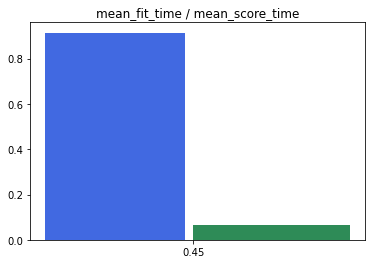

In [190]:
import matplotlib.pyplot as plt

N = 1
mean_fit_time = (results_gradient_df2.iloc[best_index_gradient2].mean_fit_time)
mean_score_time = (results_gradient_df2.iloc[best_index_gradient2].mean_score_time)

ind = np.arange(N)
print(ind)
width = 0.9 

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, mean_train_score, color='royalblue')
rects2 = ax.bar(ind+width, mean_score_time, width, color='seagreen')

gridnumber = [ 1 ]

ax.set_title('mean_fit_time / mean_score_time')
ax.set_xticks((ind + ind + width) / 2)

plt.show()

[0]


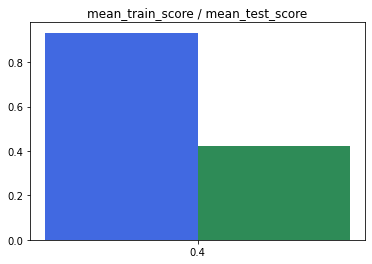

In [191]:
import matplotlib.pyplot as plt

N = 1
mean_train_score = (results_gradient_df2.iloc[best_index_gradient2].mean_train_score)
mean_test_score = (results_gradient_df2.iloc[best_index_gradient2].mean_test_score)


ind = np.arange(N)
print(ind)
width = 0.8

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, mean_train_score, color='royalblue')
rects2 = ax.bar(ind+width, mean_test_score, width, color='seagreen')


ax.set_title('mean_train_score / mean_test_score')
ax.set_xticks((ind + ind + width) / 2)

plt.show()

### Importance des Features

In [192]:
# https://scikit-learn.org/stable/modules/permutation_importance.html
from sklearn.inspection import permutation_importance
r = permutation_importance(results_gradient2, X_test, y_test,
                     n_repeats=30,
                     random_state=0)

In [200]:
for i in r.importances_mean.argsort()[::-1]:
   #if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
   print(f"{Xcols[i]:<8} => "
   f"{ r.importances_mean[i]: .3f}"
   f" +/- { r.importances_std[i]: .3f}")

LargestPropertyUseType =>  0.192 +/-  0.020
LargestPropertyUseTypeGFA =>  0.134 +/-  0.015
PrimaryPropertyType =>  0.123 +/-  0.007
NumberofBuildings =>  0.077 +/-  0.003
PropertyGFABuilding(s) =>  0.072 +/-  0.010
NumberofFloors =>  0.026 +/-  0.014
PropertyGFATotal =>  0.025 +/-  0.005
YearBuilt =>  0.012 +/-  0.005
Neighborhood =>  0.011 +/-  0.018
ENERGYSTARScore =>  0.010 +/-  0.009
PropertyGFAParking =>  0.004 +/-  0.003
BuildingType =>  0.001 +/-  0.003
Latitude => -0.001 +/-  0.006
Longitude => -0.006 +/-  0.009
